# Unsupervised Machine Learning

## Part I - Dimensionality Reduction

### Data Acquisition

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

### TSNE Estimator for Dimensionality Reduction

In [3]:
from sklearn.manifold import TSNE

In [4]:
tsne = TSNE(n_components=2, random_state=1)

In [5]:
# transforming the digits dataset's features into two dimensions
reduced_data = tsne.fit_transform(digits.data)

In [7]:
reduced_data.shape

(1797, 2)

### Visualising Reduce Data

In [14]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

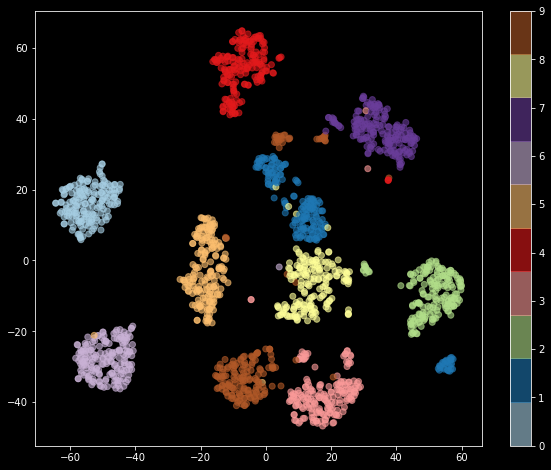

In [33]:
plt.figure(figsize=(10,8))
dots = plt.scatter(reduced_data[:,0], reduced_data[:,1], 
                   c=digits.target, alpha=0.6,
                   cmap=plt.cm.get_cmap('Paired', 10))


plt.colorbar(dots)

## Part II - k-Means Clustering

### Loading the Iris Dataset

In [34]:
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()

In [36]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
iris.data.shape

(150, 4)

In [39]:
iris.target.shape

(150,)

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Descriptive Stats

In [44]:
import pandas as pd

In [45]:
pd.set_option('max_columns', 5)

In [46]:
pd.set_option('display.width', None)

In [49]:
# create a dataset with the iris data
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [50]:
# create a column with the species names
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [51]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
pd.set_option('precision', 2)

In [53]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### Data Visualisation

In [54]:
import seaborn as sns

In [55]:
sns.set(font_scale=1.1)
sns.set_style('whitegrid')

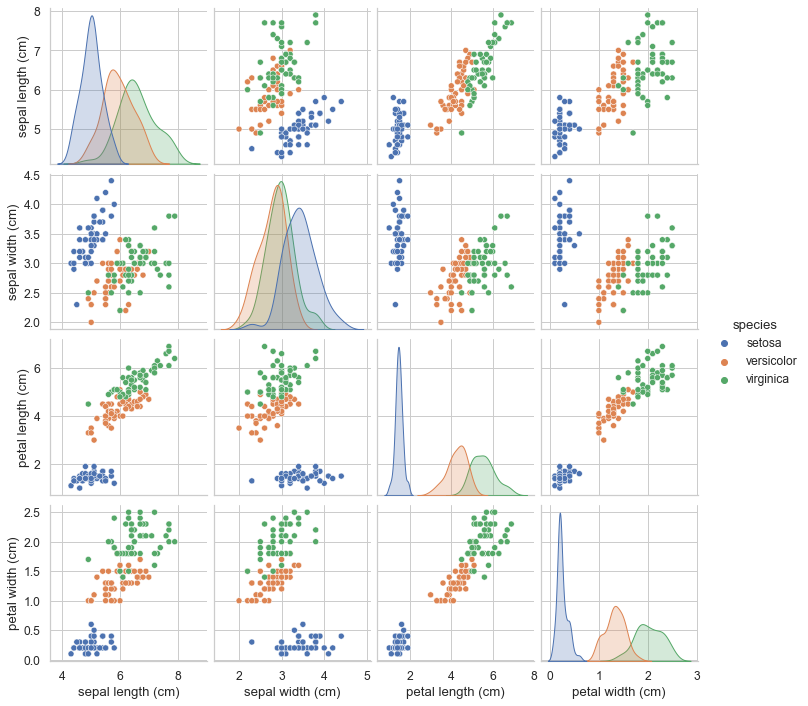

In [56]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species')

### Data Modelling - KMeans Estimator

In [57]:
from sklearn.cluster import KMeans

In [59]:
# create the estimator
kmeans = KMeans(n_clusters=3, random_state=11)

In [60]:
# Fitting the model
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=11)

In [61]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [62]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [83]:
# compare the k-mean cluster labels with the iris target values
import numpy as np
kmeans_cluster_count = np.unique(kmeans.labels_, return_counts=True)
kmeans_cluster_count[1]

array([62, 50, 38])

In [77]:
iris_cluster_count = np.unique(iris.target, return_counts=True)

In [155]:
def print_cluster_count(cl_count: np.array, names: np.array):
    print('Name\t    Count')
    labels, counts = cl_count
    for count, label in zip(counts, labels):
        print(f'{label:<10} {count:>3}')
    

In [156]:
print_cluster_count(kmeans_cluster_count, iris.target_names)

Name	    Count
0           62
1           50
2           38


In [157]:
print_cluster_count(iris_cluster_count, iris.target_names)

Name	    Count
0           50
1           50
2           50


### Dimensionality Reduction with Principal Component Analysis (PCA)

In [124]:
# creating the PCA Object
from sklearn.decomposition import PCA

In [125]:
pca = PCA(n_components=2, random_state=11)

In [126]:
# transforming the iris dataset's features into two dimensions
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

In [128]:
iris_pca = pca.transform(iris.data)

In [129]:
# checking dimensionality reduction
iris_pca.shape

(150, 2)

In [130]:
iris_pca_df = pd.DataFrame(iris_pca, columns=['Component1', 'Component2'])

In [133]:
iris_pca_df['species'] = iris_df.species

In [135]:
iris_pca_df.head()

,Component1,Component2,species
0,-2.68,0.32,setosa
1,-2.71,-0.18,setosa
2,-2.89,-0.14,setosa
3,-2.75,-0.32,setosa
4,-2.73,0.33,setosa


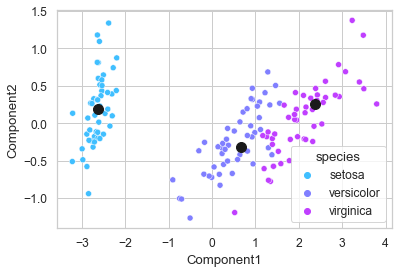

In [142]:
# scatter plot the data using Seaborn
axes = sns.scatterplot(data=iris_pca_df, x='Component1', y='Component2',
                       hue='species', legend='brief', palette='cool')

# transform centroids from 4 into 2 dimensions for plotting
iris_centers = pca.transform(kmeans.cluster_centers_)

# plot centroids as black dots
dots = plt.scatter(x=iris_centers[:,0], y=iris_centers[:,1],
                   s=100, c='k')

### Clustering Estimator Selection

In [144]:
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering,\
                            AgglomerativeClustering

In [146]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3)
}

In [147]:
import numpy as np

In [158]:
for name, estimator in estimators.items():
    estimator.fit(iris.data)
    print(f'\n{name}:')
    for i in range(0, 101, 50):
        labels, counts = np.unique(estimator.labels_[i:i+50], return_counts=True)
        print(f'{i}-{i+50}:')
        for label, count in zip(labels, counts):
            print(f'\tlabel={label}, count={count}')


KMeans:
0-50:
	label=1, count=50
50-100:
	label=0, count=48
	label=2, count=2
100-150:
	label=0, count=14
	label=2, count=36

DBSCAN:
0-50:
	label=-1, count=1
	label=0, count=49
50-100:
	label=-1, count=6
	label=1, count=44
100-150:
	label=-1, count=10
	label=1, count=40

MeanShift:
0-50:
	label=1, count=50
50-100:
	label=0, count=49
	label=1, count=1
100-150:
	label=0, count=50

SpectralClustering:
0-50:
	label=1, count=50
50-100:
	label=0, count=50
100-150:
	label=0, count=15
	label=2, count=35

AgglomerativeClustering:
0-50:
	label=1, count=50
50-100:
	label=0, count=49
	label=2, count=1
100-150:
	label=0, count=15
	label=2, count=35
